In [2]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Set the random seed for reproducibility
np.random.seed(42)

In [8]:
# Replace 'iris.csv' with your actual file path if needed
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


## ***3. Data Wrangling***

In [13]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.50,5.84,3.05,3.76,1.20,NaN
std,43.45,0.83,0.43,1.76,0.76,NaN
min,1.00,4.30,2.00,1.00,0.10,NaN
25%,38.25,5.10,2.80,1.60,0.30,NaN
50%,75.50,5.80,3.00,4.35,1.30,NaN
75%,112.75,6.40,3.30,5.10,1.80,NaN


In [14]:
# We don't need the 1st column so let's drop that
data=df.iloc[:,1:]

In [6]:
# New updated dataset
data.head()

NameError: name 'data' is not defined

In [16]:
# Check for missing values and unique classes
df["SepalLengthCm"].describe()


count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

In [17]:
df["SepalLengthCm"].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

In [18]:
df["PetalLengthCm"].describe()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64

In [19]:
df["PetalWidthCm"].describe()

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: PetalWidthCm, dtype: float64

In [20]:
df["Species"].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

In [21]:
# Check for missing values and unique classes
print(df.isnull().sum())
print(df['Species'].unique())


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***
#### Chart - 1 : Distribution of Numerical Variables

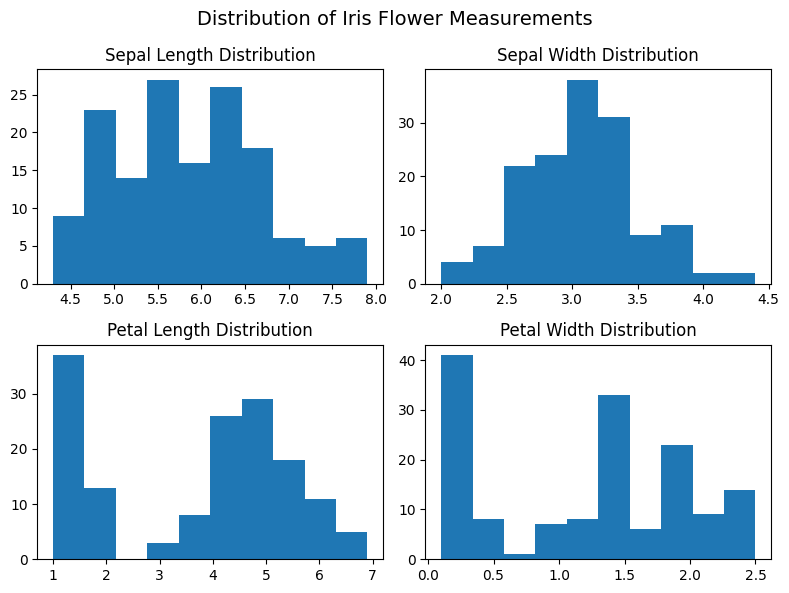

In [22]:
# Chart - 1 Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(data['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(data['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(data['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(data['PetalWidthCm'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()

In [23]:
# Use the correct column name for the target (check df.columns if unsure)
X = df.drop('Species', axis=1)
y = df['Species']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (120, 5)
Test shape: (30, 5)


## ***5. Feature Engineering & Data Pre-processing***

In [24]:
# Encode the categorical columns
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
data['Species'] = le.fit_transform(data['Species'])

# Check the unique values in the 'Species' column after encoding
unique_species = data['Species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1 2]


Data scaling 

In [25]:
# Defining the X and y
x=data.drop(columns=['Species'], axis=1)
y=data['Species']

Data splitting

In [28]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [29]:
# Checking the train distribution of dependent variable
y_train.value_counts()

Species
2    41
0    41
1    38
Name: count, dtype: int64

ML Model Implementation

In [30]:
def evaluate_model(model, x_train, x_test, y_train, y_test):

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
          # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [31]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

In [41]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [42]:
print(x_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [33]:

# 1. Split X and y TOGETHER
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# 4. Predict
y_pred = rf.predict(X_test_scaled)

# 5. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



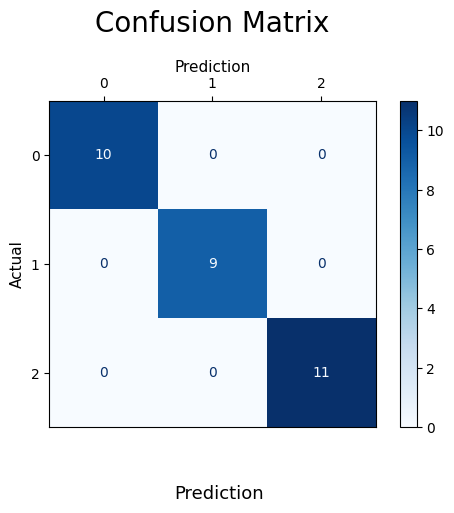

In [34]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=20,pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()


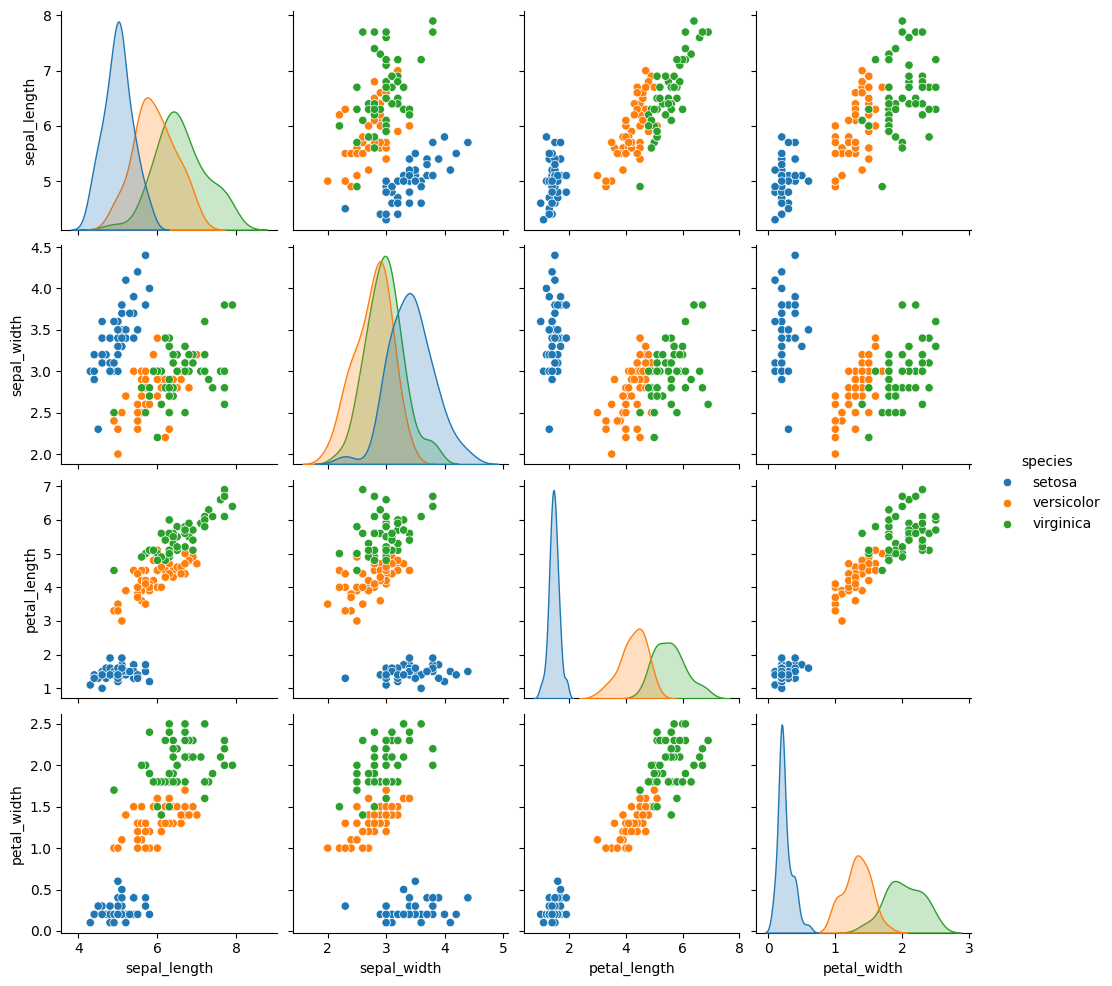

In [35]:
# Load the example dataset
iris = sns.load_dataset("iris")

# Create a pairplot
sns.pairplot(iris, hue="species")

# Display the plot
plt.show()

Histogram

Histograms with Distplot Plot

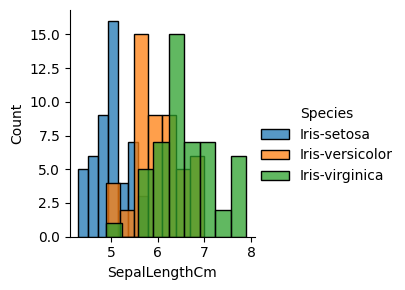

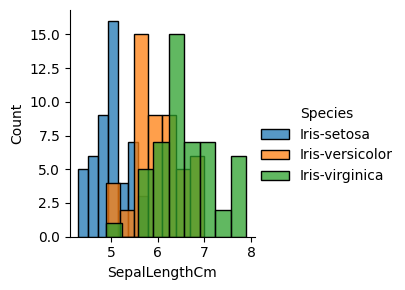

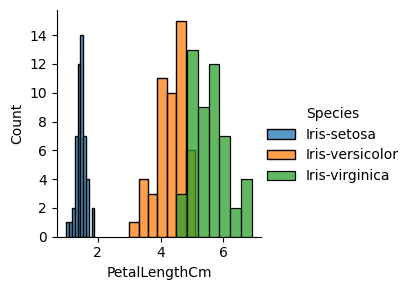

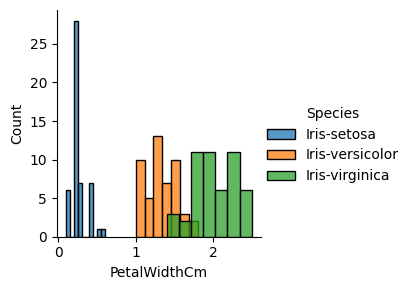

In [46]:
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "SepalLengthCm").add_legend()

plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot,"SepalLengthCm").add_legend()

plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot,"PetalLengthCm").add_legend()

plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "PetalWidthCm").add_legend()

plt.show()

In [ ]:
###Handling Correlation

In [36]:
data.select_dtypes(include=['number']).corr(method='pearson')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


Heatmaps

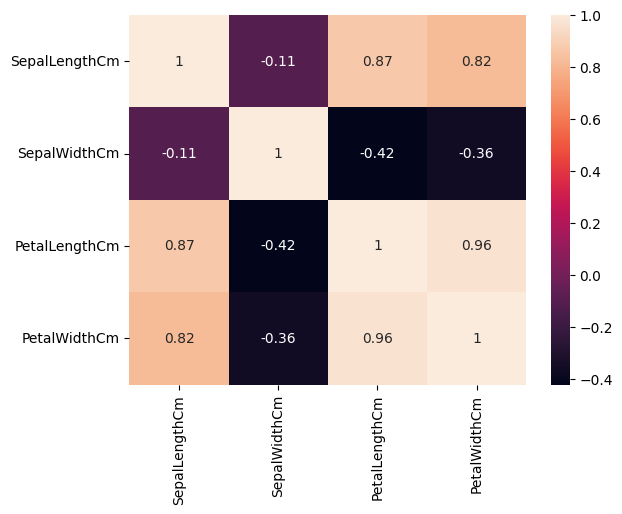

In [37]:
sns.heatmap(df.select_dtypes(include=['number']).corr(method='pearson').drop( 
['Id'], axis=1).drop(['Id'], axis=0), 
			annot = True); 
plt.show()


Boxplots

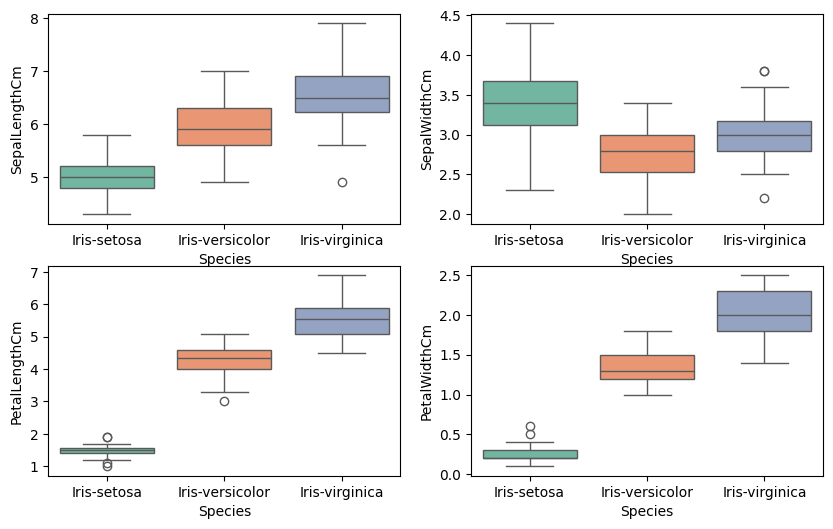

In [3]:

def graph(y):
    sns.boxplot(x="Species", y=y, data=df,hue="Species", palette="Set2", legend=False)
plt.figure(figsize=(10,6))
    
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')

plt.subplot(222)
graph('SepalWidthCm')

plt.subplot(223)
graph('PetalLengthCm')

plt.subplot(224)
graph('PetalWidthCm')

plt.show()

Machine learning models

In [38]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


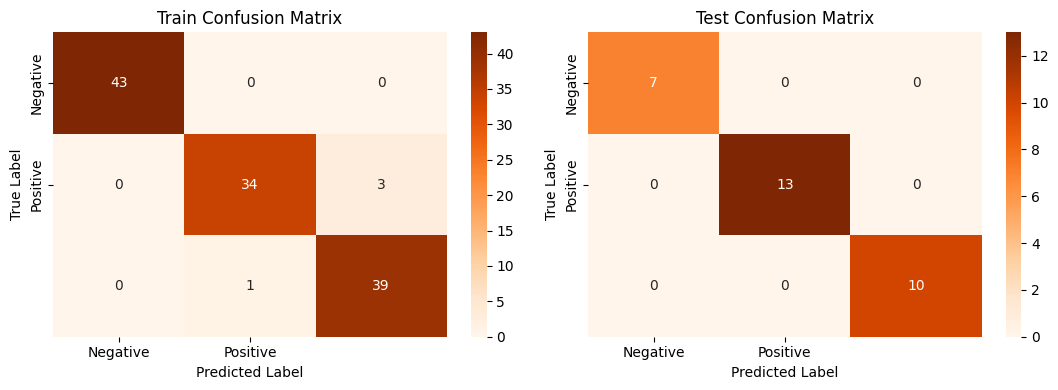


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  43        |
| 1            |    0.971429 | 0.918919 |   0.944444 |  37        |
| 2            |    0.928571 | 0.975    |   0.95122  |  40        |
| accuracy     |    0.966667 | 0.966667 |   0.966667 |   0.966667 |
| macro avg    |    0.966667 | 0.96464  |   0.965221 | 120        |
| weighted avg |    0.967381 | 0.966667 |   0.96661  | 120        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |         7 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        10 |
| accuracy     |           1 |        1 |          1 |        

In [43]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

# Updated Evaluation metric Score Chart


In [44]:
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.967381
Precision Test,1.000000
Recall Train,0.966667
Recall Test,1.000000
Accuracy Train,0.966667
Accuracy Test,1.000000
F1 macro Train,0.966610
F1 macro Test,1.000000


Cros-validation and hyperparameter tuning

In [52]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'saga'}


In [53]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Confusion Matrix:


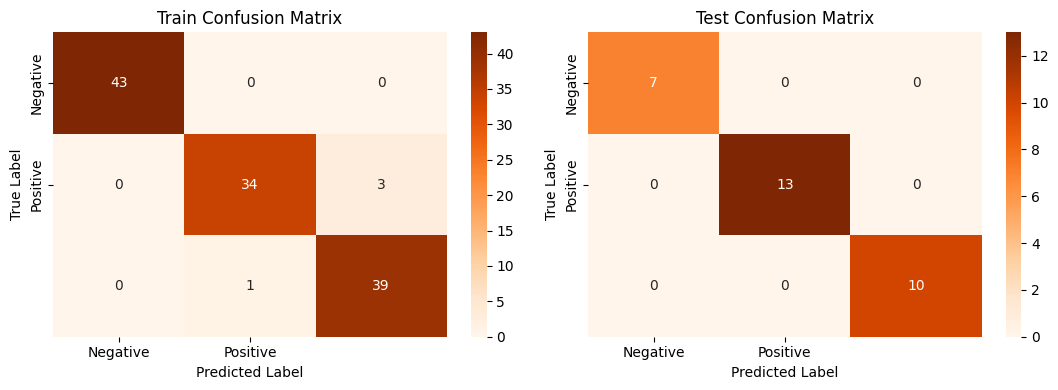


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  43        |
| 1            |    0.971429 | 0.918919 |   0.944444 |  37        |
| 2            |    0.928571 | 0.975    |   0.95122  |  40        |
| accuracy     |    0.966667 | 0.966667 |   0.966667 |   0.966667 |
| macro avg    |    0.966667 | 0.96464  |   0.965221 | 120        |
| weighted avg |    0.967381 | 0.966667 |   0.96661  | 120        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |         7 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        10 |
| accuracy     |           1 |        1 |          1 |        

In [54]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [56]:
score['Logistic regression tuned'] = lr_score2
score

,Logistic regression,Logistic regression tuned
Precision Train,0.967381,0.967381
Precision Test,1.000000,1.000000
Recall Train,0.966667,0.966667
Recall Test,1.000000,1.000000
Accuracy Train,0.966667,0.966667
Accuracy Test,1.000000,1.000000
F1 macro Train,0.966610,0.966610
F1 macro Test,1.000000,1.000000


### ML Model - 2 : Decision Tree

In [57]:
# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


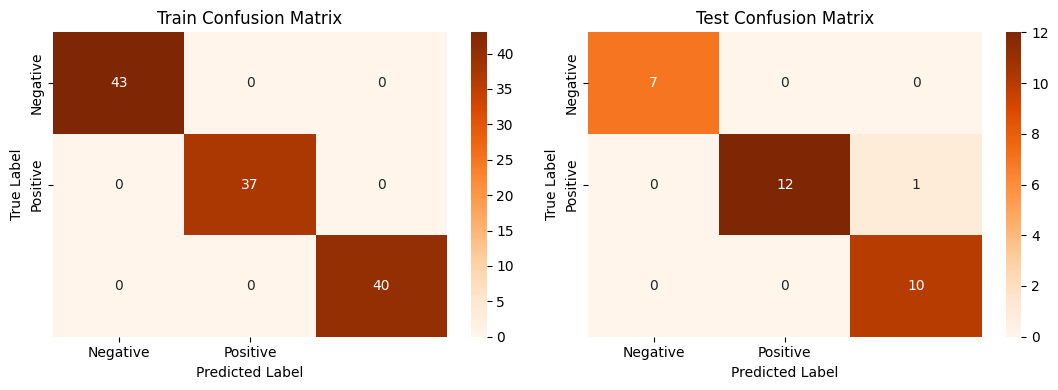


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        43 |
| 1            |           1 |        1 |          1 |        37 |
| 2            |           1 |        1 |          1 |        40 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       120 |
| weighted avg |           1 |        1 |          1 |       120 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |  7        |
| 1            |    1        | 0.923077 |   0.96     | 13        |
| 2            |    0.909091 | 1        |   0.952381 | 10        |
| accuracy     |    0.966667 | 0.966667 |   0.966667 |  0.966667 |
| m

In [58]:
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [59]:
# Updated Evaluation metric Score Chart
score['Decision Tree'] = dt_score
score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.967381,0.967381,1.000000
Precision Test,1.000000,1.000000,0.969697
Recall Train,0.966667,0.966667,1.000000
Recall Test,1.000000,1.000000,0.966667
Accuracy Train,0.966667,0.966667,1.000000
Accuracy Test,1.000000,1.000000,0.966667
F1 macro Train,0.966610,0.966610,1.000000
F1 macro Test,1.000000,1.000000,0.966794


#### 2. Cross- Validation & Hyperparameter Tuning

In [60]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': np.int64(10), 'min_samples_split': np.int64(6)}


In [61]:
# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Confusion Matrix:


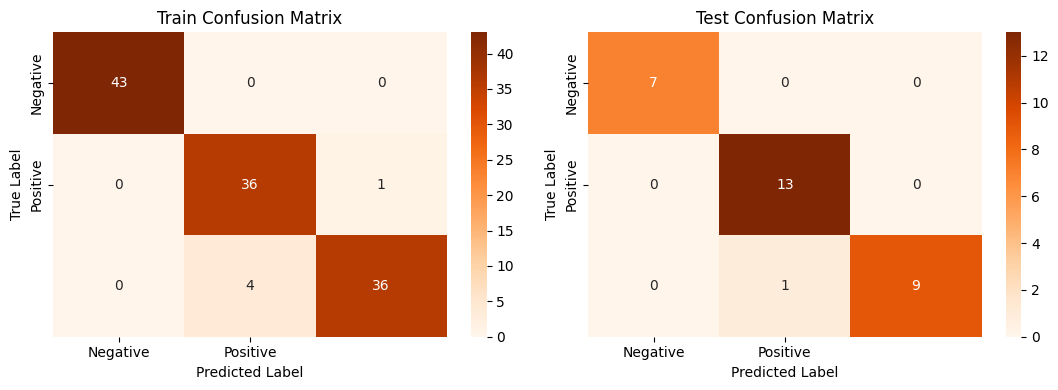


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  43        |
| 1            |    0.9      | 0.972973 |   0.935065 |  37        |
| 2            |    0.972973 | 0.9      |   0.935065 |  40        |
| accuracy     |    0.958333 | 0.958333 |   0.958333 |   0.958333 |
| macro avg    |    0.957658 | 0.957658 |   0.95671  | 120        |
| weighted avg |    0.960158 | 0.958333 |   0.958333 | 120        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |  7        |
| 1            |    0.928571 | 1        |   0.962963 | 13        |
| 2            |    1        | 0.9      |   0.947368 | 10        |
| accuracy     |    0.966667 | 0.966667 |   0.966667 |  0.9666

In [62]:
# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

In [63]:
score['Decision Tree tuned'] = dt2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned
Precision Train,0.967381,0.967381,1.000000,0.960158
Precision Test,1.000000,1.000000,0.969697,0.969048
Recall Train,0.966667,0.966667,1.000000,0.958333
Recall Test,1.000000,1.000000,0.966667,0.966667
Accuracy Train,0.966667,0.966667,1.000000,0.958333
Accuracy Test,1.000000,1.000000,0.966667,0.966667
F1 macro Train,0.966610,0.966610,1.000000,0.958333
F1 macro Test,1.000000,1.000000,0.966794,0.966407


### ML Model - 3 : Random Forest

In [64]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


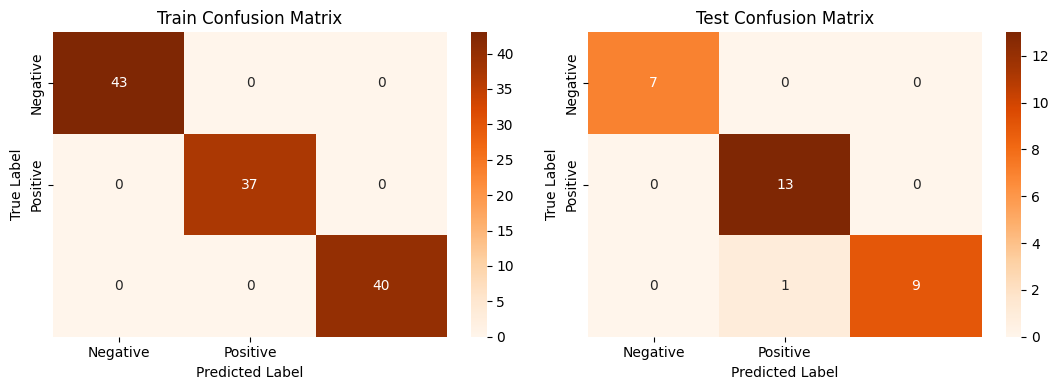


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        43 |
| 1            |           1 |        1 |          1 |        37 |
| 2            |           1 |        1 |          1 |        40 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       120 |
| weighted avg |           1 |        1 |          1 |       120 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |  7        |
| 1            |    0.928571 | 1        |   0.962963 | 13        |
| 2            |    1        | 0.9      |   0.947368 | 10        |
| accuracy     |    0.966667 | 0.966667 |   0.966667 |  0.966667 |
| m

In [65]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [66]:
# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.967381,0.967381,1.000000,0.960158,1.000000
Precision Test,1.000000,1.000000,0.969697,0.969048,0.969048
Recall Train,0.966667,0.966667,1.000000,0.958333,1.000000
Recall Test,1.000000,1.000000,0.966667,0.966667,0.966667
Accuracy Train,0.966667,0.966667,1.000000,0.958333,1.000000
Accuracy Test,1.000000,1.000000,0.966667,0.966667,0.966667
F1 macro Train,0.966610,0.966610,1.000000,0.958333,1.000000
F1 macro Test,1.000000,1.000000,0.966794,0.966407,0.966407


#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 200, 'min_samples_split': 4, 'max_depth': 13}


In [68]:
# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Confusion Matrix:


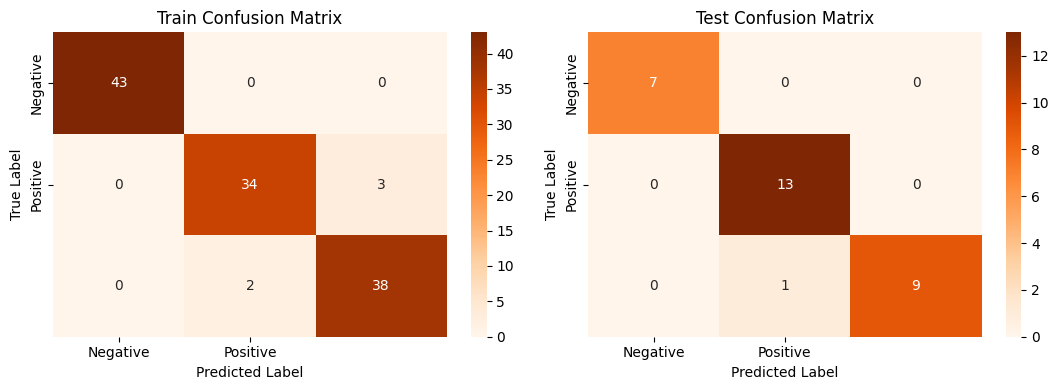


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  43        |
| 1            |    0.944444 | 0.918919 |   0.931507 |  37        |
| 2            |    0.926829 | 0.95     |   0.938272 |  40        |
| accuracy     |    0.958333 | 0.958333 |   0.958333 |   0.958333 |
| macro avg    |    0.957091 | 0.956306 |   0.956593 | 120        |
| weighted avg |    0.95848  | 0.958333 |   0.958305 | 120        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |  7        |
| 1            |    0.928571 | 1        |   0.962963 | 13        |
| 2            |    1        | 0.9      |   0.947368 | 10        |
| accuracy     |    0.966667 | 0.966667 |   0.966667 |  0.9666

In [69]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

In [70]:
score['Random Forest tuned'] = rf2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned
Precision Train,0.967381,0.967381,1.000000,0.960158,1.000000,0.958480
Precision Test,1.000000,1.000000,0.969697,0.969048,0.969048,0.969048
Recall Train,0.966667,0.966667,1.000000,0.958333,1.000000,0.958333
Recall Test,1.000000,1.000000,0.966667,0.966667,0.966667,0.966667
Accuracy Train,0.966667,0.966667,1.000000,0.958333,1.000000,0.958333
Accuracy Test,1.000000,1.000000,0.966667,0.966667,0.966667,0.966667
F1 macro Train,0.966610,0.966610,1.000000,0.958333,1.000000,0.958305
F1 macro Test,1.000000,1.000000,0.966794,0.966407,0.966407,0.966407


### ML Model - 4 : SVM (Support Vector Machine)

In [71]:
# ML Model - 4 Implementation
svm_model = SVC(kernel='linear', random_state=0, probability=True)

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


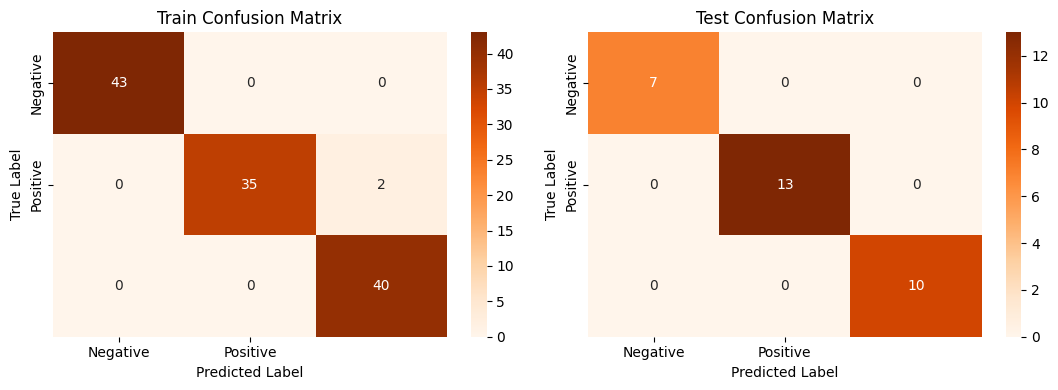


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  43        |
| 1            |    1        | 0.945946 |   0.972222 |  37        |
| 2            |    0.952381 | 1        |   0.97561  |  40        |
| accuracy     |    0.983333 | 0.983333 |   0.983333 |   0.983333 |
| macro avg    |    0.984127 | 0.981982 |   0.982611 | 120        |
| weighted avg |    0.984127 | 0.983333 |   0.983305 | 120        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |         7 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        10 |
| accuracy     |           1 |        1 |          1 |        

In [72]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)

In [73]:
# Updated Evaluation metric Score Chart
score['SVM'] = svm_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM
Precision Train,0.967381,0.967381,1.000000,0.960158,1.000000,0.958480,0.984127
Precision Test,1.000000,1.000000,0.969697,0.969048,0.969048,0.969048,1.000000
Recall Train,0.966667,0.966667,1.000000,0.958333,1.000000,0.958333,0.983333
Recall Test,1.000000,1.000000,0.966667,0.966667,0.966667,0.966667,1.000000
Accuracy Train,0.966667,0.966667,1.000000,0.958333,1.000000,0.958333,0.983333
Accuracy Test,1.000000,1.000000,0.966667,0.966667,0.966667,0.966667,1.000000
F1 macro Train,0.966610,0.966610,1.000000,0.958333,1.000000,0.958305,0.983305
F1 macro Test,1.000000,1.000000,0.966794,0.966407,0.966407,0.966407,1.000000


#### 2. Cross- Validation & Hyperparameter Tuning

In [74]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'poly', 'degree': np.int64(2), 'C': np.float64(3.8000000000000003)}


In [75]:
# Initialize model with best parameters
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Confusion Matrix:


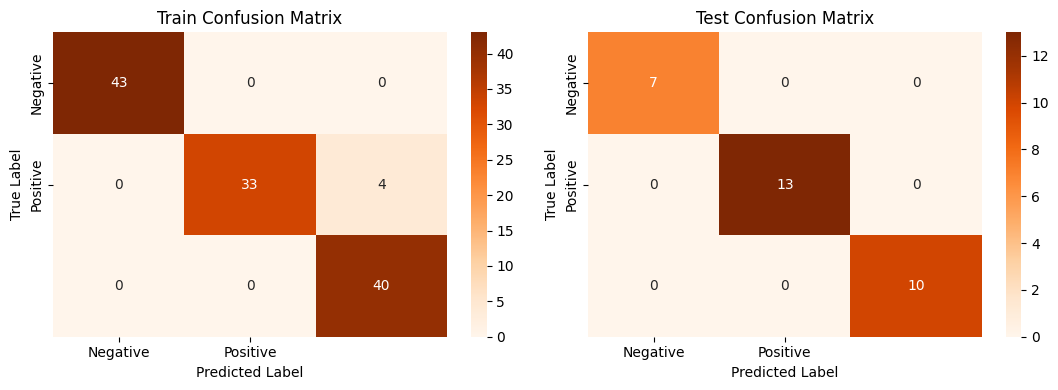


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  43        |
| 1            |    1        | 0.891892 |   0.942857 |  37        |
| 2            |    0.909091 | 1        |   0.952381 |  40        |
| accuracy     |    0.966667 | 0.966667 |   0.966667 |   0.966667 |
| macro avg    |    0.969697 | 0.963964 |   0.965079 | 120        |
| weighted avg |    0.969697 | 0.966667 |   0.966508 | 120        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |         7 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        10 |
| accuracy     |           1 |        1 |          1 |        

In [76]:
# Visualizing evaluation Metric Score chart
svm2_score = evaluate_model(svm_model2, x_train, x_test, y_train, y_test)

In [77]:
score['SVM tuned'] = svm2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned
Precision Train,0.967381,0.967381,1.000000,0.960158,1.000000,0.958480,0.984127,0.969697
Precision Test,1.000000,1.000000,0.969697,0.969048,0.969048,0.969048,1.000000,1.000000
Recall Train,0.966667,0.966667,1.000000,0.958333,1.000000,0.958333,0.983333,0.966667
Recall Test,1.000000,1.000000,0.966667,0.966667,0.966667,0.966667,1.000000,1.000000
Accuracy Train,0.966667,0.966667,1.000000,0.958333,1.000000,0.958333,0.983333,0.966667
Accuracy Test,1.000000,1.000000,0.966667,0.966667,0.966667,0.966667,1.000000,1.000000
F1 macro Train,0.966610,0.966610,1.000000,0.958333,1.000000,0.958305,0.983305,0.966508
F1 macro Test,1.000000,1.000000,0.966794,0.966407,0.966407,0.966407,1.000000,1.000000


### ML Model - 5 : Xtreme Gradient Boosting

In [78]:
# ML Model - 5 Implementation
xgb_model = xgb.XGBClassifier()

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


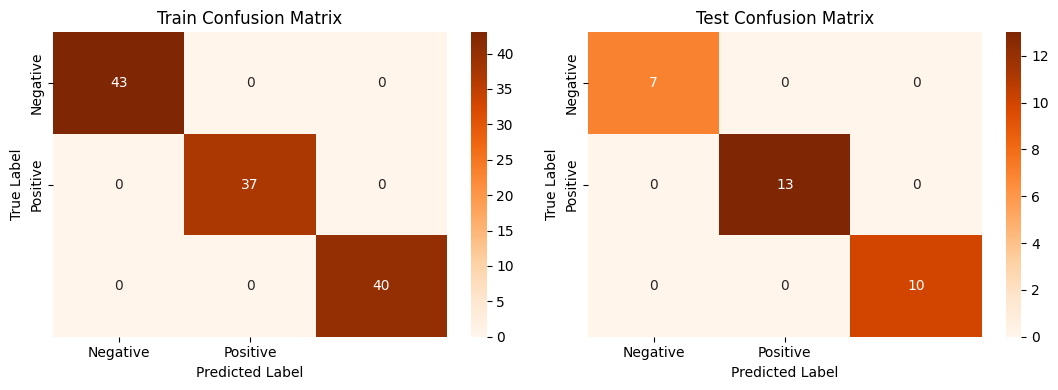


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        43 |
| 1            |           1 |        1 |          1 |        37 |
| 2            |           1 |        1 |          1 |        40 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       120 |
| weighted avg |           1 |        1 |          1 |       120 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |         7 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        10 |
| accuracy     |           1 |        1 |          1 |         1 |
| m

In [79]:
# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, x_train, x_test, y_train, y_test)

In [80]:
# Updated Evaluation metric Score Chart
score['XGB'] = xgb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB
Precision Train,0.967381,0.967381,1.000000,0.960158,1.000000,0.958480,0.984127,0.969697,1.0
Precision Test,1.000000,1.000000,0.969697,0.969048,0.969048,0.969048,1.000000,1.000000,1.0
Recall Train,0.966667,0.966667,1.000000,0.958333,1.000000,0.958333,0.983333,0.966667,1.0
Recall Test,1.000000,1.000000,0.966667,0.966667,0.966667,0.966667,1.000000,1.000000,1.0
Accuracy Train,0.966667,0.966667,1.000000,0.958333,1.000000,0.958333,0.983333,0.966667,1.0
Accuracy Test,1.000000,1.000000,0.966667,0.966667,0.966667,0.966667,1.000000,1.000000,1.0
F1 macro Train,0.966610,0.966610,1.000000,0.958333,1.000000,0.958305,0.983305,0.966508,1.0
F1 macro Test,1.000000,1.000000,0.966794,0.966407,0.966407,0.966407,1.000000,1.000000,1.0


#### 2. Cross- Validation & Hyperparameter Tuning

In [81]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2 = xgb.XGBClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': np.int64(100), 'max_depth': np.int64(9), 'learning_rate': np.float64(0.01)}


In [82]:
# Initialize model with best parameters
xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


Confusion Matrix:


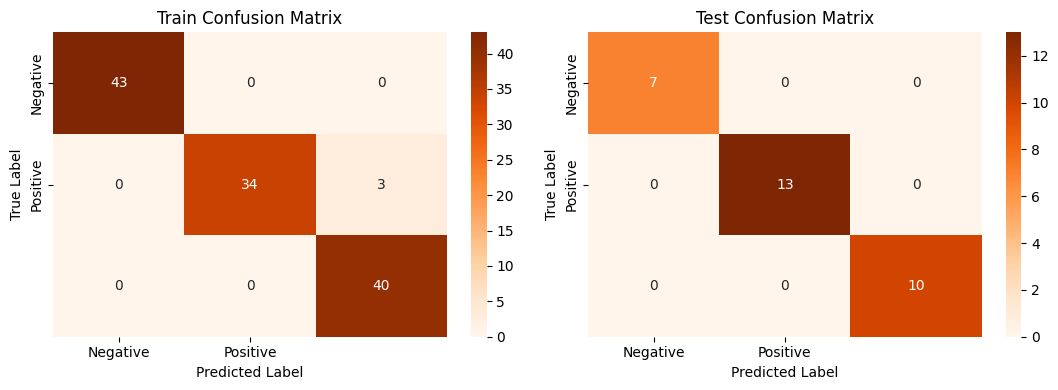


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |    43     |
| 1            |    1        | 0.918919 |   0.957746 |    37     |
| 2            |    0.930233 | 1        |   0.963855 |    40     |
| accuracy     |    0.975    | 0.975    |   0.975    |     0.975 |
| macro avg    |    0.976744 | 0.972973 |   0.973867 |   120     |
| weighted avg |    0.976744 | 0.975    |   0.974924 |   120     |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |         7 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        10 |
| accuracy     |           1 |        1 |          1 |         1 |
| m

In [83]:
# Visualizing evaluation Metric Score chart
xgb2_score = evaluate_model(xgb_model2, x_train, x_test, y_train, y_test)

In [84]:
score['XGB tuned'] = xgb2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned
Precision Train,0.967381,0.967381,1.000000,0.960158,1.000000,0.958480,0.984127,0.969697,1.0,0.976744
Precision Test,1.000000,1.000000,0.969697,0.969048,0.969048,0.969048,1.000000,1.000000,1.0,1.000000
Recall Train,0.966667,0.966667,1.000000,0.958333,1.000000,0.958333,0.983333,0.966667,1.0,0.975000
Recall Test,1.000000,1.000000,0.966667,0.966667,0.966667,0.966667,1.000000,1.000000,1.0,1.000000
Accuracy Train,0.966667,0.966667,1.000000,0.958333,1.000000,0.958333,0.983333,0.966667,1.0,0.975000
Accuracy Test,1.000000,1.000000,0.966667,0.966667,0.966667,0.966667,1.000000,1.000000,1.0,1.000000
F1 macro Train,0.966610,0.966610,1.000000,0.958333,1.000000,0.958305,0.983305,0.966508,1.0,0.974924
F1 macro Test,1.000000,1.000000,0.966794,0.966407,0.966407,0.966407,1.000000,1.000000,1.0,1.000000


### ML Model - 6 : Naive Bayes

In [85]:
# ML Model - 6 Implementation
nb_model = GaussianNB()

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


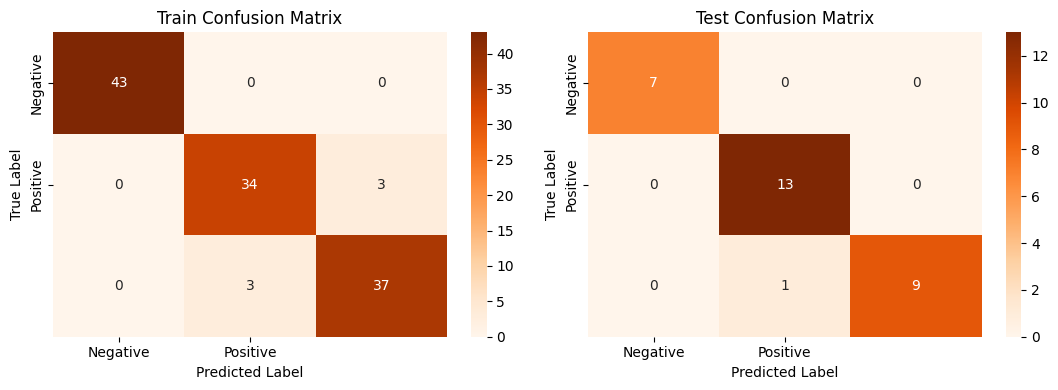


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |     43    |
| 1            |    0.918919 | 0.918919 |   0.918919 |     37    |
| 2            |    0.925    | 0.925    |   0.925    |     40    |
| accuracy     |    0.95     | 0.95     |   0.95     |      0.95 |
| macro avg    |    0.947973 | 0.947973 |   0.947973 |    120    |
| weighted avg |    0.95     | 0.95     |   0.95     |    120    |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |  7        |
| 1            |    0.928571 | 1        |   0.962963 | 13        |
| 2            |    1        | 0.9      |   0.947368 | 10        |
| accuracy     |    0.966667 | 0.966667 |   0.966667 |  0.966667 |
| m

In [86]:
# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)

In [87]:
# Updated Evaluation metric Score Chart
score['Naive Bayes'] = nb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes
Precision Train,0.967381,0.967381,1.000000,0.960158,1.000000,0.958480,0.984127,0.969697,1.0,0.976744,0.950000
Precision Test,1.000000,1.000000,0.969697,0.969048,0.969048,0.969048,1.000000,1.000000,1.0,1.000000,0.969048
Recall Train,0.966667,0.966667,1.000000,0.958333,1.000000,0.958333,0.983333,0.966667,1.0,0.975000,0.950000
Recall Test,1.000000,1.000000,0.966667,0.966667,0.966667,0.966667,1.000000,1.000000,1.0,1.000000,0.966667
Accuracy Train,0.966667,0.966667,1.000000,0.958333,1.000000,0.958333,0.983333,0.966667,1.0,0.975000,0.950000
Accuracy Test,1.000000,1.000000,0.966667,0.966667,0.966667,0.966667,1.000000,1.000000,1.0,1.000000,0.966667
F1 macro Train,0.966610,0.966610,1.000000,0.958333,1.000000,0.958305,0.983305,0.966508,1.0,0.974924,0.950000
F1 macro Test,1.000000,1.000000,0.966794,0.966407,0.966407,0.966407,1.000000,1.000000,1.0,1.000000,0.966407


#### 2. Cross- Validation & Hyperparameter Tuning

In [88]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(x_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': np.float64(0.002848035868435802)}


In [89]:
# Initiate model with best parameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Confusion Matrix:


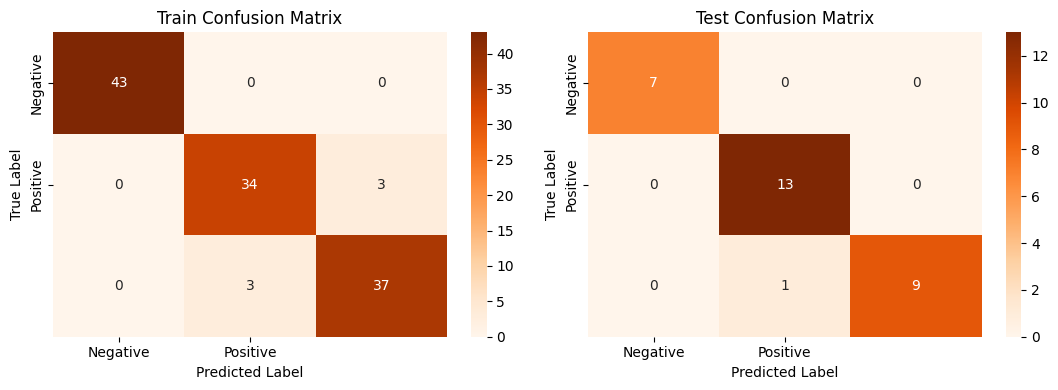


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |     43    |
| 1            |    0.918919 | 0.918919 |   0.918919 |     37    |
| 2            |    0.925    | 0.925    |   0.925    |     40    |
| accuracy     |    0.95     | 0.95     |   0.95     |      0.95 |
| macro avg    |    0.947973 | 0.947973 |   0.947973 |    120    |
| weighted avg |    0.95     | 0.95     |   0.95     |    120    |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |  7        |
| 1            |    0.928571 | 1        |   0.962963 | 13        |
| 2            |    1        | 0.9      |   0.947368 | 10        |
| accuracy     |    0.966667 | 0.966667 |   0.966667 |  0.966667 |
| m

In [90]:
# Visualizing evaluation Metric Score chart
nb2_score = evaluate_model(nb_model2, x_train, x_test, y_train, y_test)

In [91]:
score['Naive Bayes tuned']= nb2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned
Precision Train,0.967381,0.967381,1.000000,0.960158,1.000000,0.958480,0.984127,0.969697,1.0,0.976744,0.950000,0.950000
Precision Test,1.000000,1.000000,0.969697,0.969048,0.969048,0.969048,1.000000,1.000000,1.0,1.000000,0.969048,0.969048
Recall Train,0.966667,0.966667,1.000000,0.958333,1.000000,0.958333,0.983333,0.966667,1.0,0.975000,0.950000,0.950000
Recall Test,1.000000,1.000000,0.966667,0.966667,0.966667,0.966667,1.000000,1.000000,1.0,1.000000,0.966667,0.966667
Accuracy Train,0.966667,0.966667,1.000000,0.958333,1.000000,0.958333,0.983333,0.966667,1.0,0.975000,0.950000,0.950000
Accuracy Test,1.000000,1.000000,0.966667,0.966667,0.966667,0.966667,1.000000,1.000000,1.0,1.000000,0.966667,0.966667
F1 macro Train,0.966610,0.966610,1.000000,0.958333,1.000000,0.958305,0.983305,0.966508,1.0,0.974924,0.950000,0.950000
F1 macro Test,1.000000,1.000000,0.966794,0.966407,0.966407,0.966407,1.000000,1.000000,1.0,1.000000,0.966407,0.966407


### ML Model - 7 : Neural Network

In [92]:
# ML Model - 7 Implementation
nn_model = MLPClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


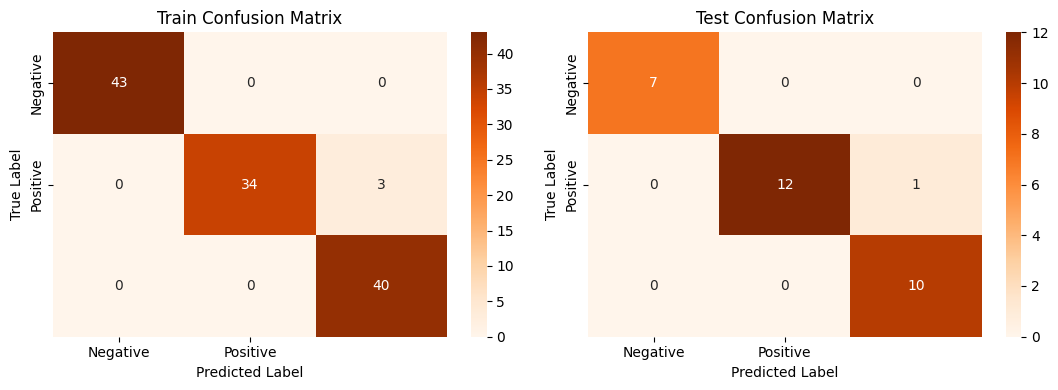


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |    43     |
| 1            |    1        | 0.918919 |   0.957746 |    37     |
| 2            |    0.930233 | 1        |   0.963855 |    40     |
| accuracy     |    0.975    | 0.975    |   0.975    |     0.975 |
| macro avg    |    0.976744 | 0.972973 |   0.973867 |   120     |
| weighted avg |    0.976744 | 0.975    |   0.974924 |   120     |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |  7        |
| 1            |    1        | 0.923077 |   0.96     | 13        |
| 2            |    0.909091 | 1        |   0.952381 | 10        |
| accuracy     |    0.966667 | 0.966667 |   0.966667 |  0.966667 |
| m

In [93]:
# Visualizing evaluation Metric Score chart
neural_score = evaluate_model(nn_model, x_train, x_test, y_train, y_test)

In [94]:
# Updated Evaluation metric Score Chart
score['Neural Network'] = neural_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network
Precision Train,0.967381,0.967381,1.000000,0.960158,1.000000,0.958480,0.984127,0.969697,1.0,0.976744,0.950000,0.950000,0.976744
Precision Test,1.000000,1.000000,0.969697,0.969048,0.969048,0.969048,1.000000,1.000000,1.0,1.000000,0.969048,0.969048,0.969697
Recall Train,0.966667,0.966667,1.000000,0.958333,1.000000,0.958333,0.983333,0.966667,1.0,0.975000,0.950000,0.950000,0.975000
Recall Test,1.000000,1.000000,0.966667,0.966667,0.966667,0.966667,1.000000,1.000000,1.0,1.000000,0.966667,0.966667,0.966667
Accuracy Train,0.966667,0.966667,1.000000,0.958333,1.000000,0.958333,0.983333,0.966667,1.0,0.975000,0.950000,0.950000,0.975000
Accuracy Test,1.000000,1.000000,0.966667,0.966667,0.966667,0.966667,1.000000,1.000000,1.0,1.000000,0.966667,0.966667,0.966667
F1 macro Train,0.966610,0.966610,1.000000,0.958333,1.000000,0.958305,0.983305,0.966508,1.0,0.974924,0.950000,0.950000,0.974924
F1 macro Test,1.000000,1.000000,0.966794,0.966407,0.966407,0.966407,1.000000,1.000000,1.0,1.000000,0.966407,0.966407,0.966794


#### 2. Cross- Validation & Hyperparameter Tuning

In [95]:
# ML Model - 7 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

# Initialize the model
neural = MLPClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'hidden_layer_sizes': np.int64(60), 'alpha': np.float64(0.007500000000000001)}


In [96]:
# Initiate model with best parameters
nn_model2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)


Confusion Matrix:


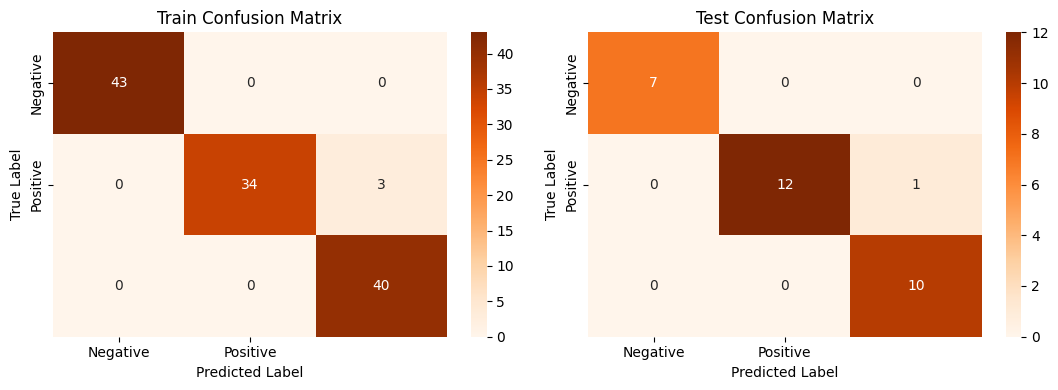


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |    43     |
| 1            |    1        | 0.918919 |   0.957746 |    37     |
| 2            |    0.930233 | 1        |   0.963855 |    40     |
| accuracy     |    0.975    | 0.975    |   0.975    |     0.975 |
| macro avg    |    0.976744 | 0.972973 |   0.973867 |   120     |
| weighted avg |    0.976744 | 0.975    |   0.974924 |   120     |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |  7        |
| 1            |    1        | 0.923077 |   0.96     | 13        |
| 2            |    0.909091 | 1        |   0.952381 | 10        |
| accuracy     |    0.966667 | 0.966667 |   0.966667 |  0.966667 |
| m

In [97]:
# Visualizing evaluation Metric Score chart
neural2_score = evaluate_model(nn_model2, x_train, x_test, y_train, y_test)

In [98]:
score['Neural Network tuned']= neural2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network,Neural Network tuned
Precision Train,0.967381,0.967381,1.000000,0.960158,1.000000,0.958480,0.984127,0.969697,1.0,0.976744,0.950000,0.950000,0.976744,0.976744
Precision Test,1.000000,1.000000,0.969697,0.969048,0.969048,0.969048,1.000000,1.000000,1.0,1.000000,0.969048,0.969048,0.969697,0.969697
Recall Train,0.966667,0.966667,1.000000,0.958333,1.000000,0.958333,0.983333,0.966667,1.0,0.975000,0.950000,0.950000,0.975000,0.975000
Recall Test,1.000000,1.000000,0.966667,0.966667,0.966667,0.966667,1.000000,1.000000,1.0,1.000000,0.966667,0.966667,0.966667,0.966667
Accuracy Train,0.966667,0.966667,1.000000,0.958333,1.000000,0.958333,0.983333,0.966667,1.0,0.975000,0.950000,0.950000,0.975000,0.975000
Accuracy Test,1.000000,1.000000,0.966667,0.966667,0.966667,0.966667,1.000000,1.000000,1.0,1.000000,0.966667,0.966667,0.966667,0.966667
F1 macro Train,0.966610,0.966610,1.000000,0.958333,1.000000,0.958305,0.983305,0.966508,1.0,0.974924,0.950000,0.950000,0.974924,0.974924
F1 macro Test,1.000000,1.000000,0.966794,0.966407,0.966407,0.966407,1.000000,1.000000,1.0,1.000000,0.966407,0.966407,0.966794,0.966794


In [99]:
print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |      SVM |   SVM tuned |   XGB |   XGB tuned |   Naive Bayes |   Naive Bayes tuned |   Neural Network |   Neural Network tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|------------:|------:|------------:|--------------:|--------------------:|-----------------:|-----------------------:|
| Precision Train |              0.967381 |                    0.967381 |        1        |              0.960158 |        1        |              0.95848  | 0.984127 |    0.969697 |     1 |    0.976744 |      0.95     |            0.95     |         0.976744 |               0.976744 |
| Precision Test  |              1        |                    1        |        0.969697 |              0.969048 |        0.969048 |      

## ***Selection of best model***

In [100]:
# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Logistic regression,0.967381,1.000000,0.966667,1.000000,0.966667,1.000000,0.966610,1.000000
Logistic regression tuned,0.967381,1.000000,0.966667,1.000000,0.966667,1.000000,0.966610,1.000000
Decision Tree tuned,0.960158,0.969048,0.958333,0.966667,0.958333,0.966667,0.958333,0.966407
Random Forest tuned,0.958480,0.969048,0.958333,0.966667,0.958333,0.966667,0.958305,0.966407
SVM tuned,0.969697,1.000000,0.966667,1.000000,0.966667,1.000000,0.966508,1.000000
XGB tuned,0.976744,1.000000,0.975000,1.000000,0.975000,1.000000,0.974924,1.000000
Naive Bayes,0.950000,0.969048,0.950000,0.966667,0.950000,0.966667,0.950000,0.966407
Naive Bayes tuned,0.950000,0.969048,0.950000,0.966667,0.950000,0.966667,0.950000,0.966407
Neural Network,0.976744,0.969697,0.975000,0.966667,0.975000,0.966667,0.974924,0.966794
Neural Network tuned,0.976744,0.969697,0.975000,0.966667,0.975000,0.966667,0.974924,0.966794


In [101]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [102]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Logistic regression - 1.0
Recall: Logistic regression - 1.0
Accuracy: Logistic regression - 1.0
F1 macro: Logistic regression - 1.0


In [103]:
# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model      |   Recall Train |   Recall Test |
|:--------------------------|---------------:|--------------:|
| Logistic regression       |       0.966667 |      1        |
| Logistic regression tuned |       0.966667 |      1        |
| Decision Tree tuned       |       0.958333 |      0.966667 |
| Random Forest tuned       |       0.958333 |      0.966667 |
| SVM tuned                 |       0.966667 |      1        |
| XGB tuned                 |       0.975    |      1        |
| Naive Bayes               |       0.95     |      0.966667 |
| Naive Bayes tuned         |       0.95     |      0.966667 |
| Neural Network            |       0.975    |      0.966667 |
| Neural Network tuned      |       0.975    |      0.966667 |


### 3. Explain the model which i have used for the prediction

In [104]:
# Define a list of category labels for reference.
Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']

In [106]:
# In this example, it's a data point with Sepal Length, Sepal Width, Petal Length, and Petal Width.
x_rf = np.array([[5.1, 3.5, 1.4, 0.2]])

# Use the tuned random forest model (rf_model2) to make a prediction.
x_rf_prediction = rf_model2.predict(x_rf)
x_rf_prediction[0]

# Display the predicted category label.
print(Category_RF[int(x_rf_prediction[0])])

Iris-Setosa
